In [33]:
import gmaps
import numpy as np
import pandas as pd
import os
import scipy.stats as st
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy
from scipy.stats import chisquare
from scipy.stats import linregress
from sklearn import linear_model
import statsmodels.api as sm

# # Google developer API key
# from config import gkey

# # Configure gmaps
# gmaps.configure(api_key=gkey)

#This is the general/common section
path = pd.read_csv('../01._Prospective_Project_Data/1._72199_158097_compressed_indeed_job_dataset.csv/indeed_job_dataset_V3_CSV.csv')
df = pd.DataFrame(path)
df

df.fillna(0) 
df



,Index_No,Job_Title,Link,Queried_Salary,<80000,80000-99999,100000-119999,120000-139999,140000-159999,>160000,...,spss,softwaredevelopment,shellscripting,datascience,docker,mongodb,.net,projectmanagement,businessintelligence,s3
0,0.0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,3.0,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5711,5711.0,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
5712,5712.0,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5713,5713.0,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
5714,5714.0,Principal Visual Analytics / Big Data Engineer...,https://www.indeed.com/rc/clk?jk=605a2c61478f1...,>160000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [72]:
path2 = pd.read_csv('../01._Prospective_Project_Data/BLS_Data/OES_Report-V2.csv')
BLS_df = pd.DataFrame(path2)
BLS_df
BLS_df["Annual mean wage(2)"] = BLS_df["Annual mean wage(2)"].str.replace(",","")
BLS_df["Annual mean wage(2)"] = BLS_df["Annual mean wage(2)"].astype("float64")
BLS_df = BLS_df.groupby('State_Two-Letter').agg({"Annual mean wage(2)":"mean"}).reset_index()
# # BLS_df
# # BLS_df = pd.DataFrame(BLS_df).mean()
BLS_df



,State_Two-Letter,Annual mean wage(2)
0,AK,59290.0
1,AL,44930.0
2,AR,42690.0
3,AZ,50930.0
4,CA,61290.0
5,CO,57690.0
6,CT,62350.0
7,DC,89800.0
8,DE,54370.0
9,FL,47750.0


In [78]:
df_grouped= df.groupby('Location')['Salary_Index'].agg(['mean','median', 'var', 'std', 'sem']).reset_index()
df_grouped = pd.DataFrame(df_grouped)
df_grouped
df_grouped

df_grouped = df_grouped.rename(columns={'Location':'State_Two-Letter'})
df_grouped

,State_Two-Letter,mean,median,var,std,sem
0,AL,2.529412,2.0,0.889706,0.943242,0.228770
1,AR,2.714286,3.0,1.470899,1.212806,0.229199
2,AZ,2.792453,3.0,1.206096,1.098224,0.150853
3,CA,3.969176,4.0,2.131761,1.460055,0.039091
4,CO,2.963303,3.0,1.350493,1.162107,0.111310
5,CT,2.933333,3.0,1.927928,1.388498,0.160330
6,DC,3.107143,3.0,1.549589,1.244825,0.105207
7,DE,3.470588,3.0,1.639706,1.280510,0.310569
8,FL,2.514563,3.0,1.546354,1.243525,0.122528
9,GA,2.589928,2.0,1.678449,1.295550,0.109887


In [75]:
# df_grouped = df_grouped['Location']=['REMOTE','USA'])
df_grouped = df_grouped['Location'].drop['REMOTE','USA']
df_grouped

TypeError: 'method' object is not subscriptable

In [ ]:

# state = ['AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD',\
#         'MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC',\
#          'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
# df_grouped['state'] = state
# df_grouped

In [79]:
# merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
# school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
merge_df = pd.merge(BLS_df, df_grouped, how='left', on='State_Two-Letter')      
merge_df

,State_Two-Letter,Annual mean wage(2),mean,median,var,std,sem
0,AK,59290.0,NaN,NaN,NaN,NaN,NaN
1,AL,44930.0,2.529412,2.0,0.889706,0.943242,0.228770
2,AR,42690.0,2.714286,3.0,1.470899,1.212806,0.229199
3,AZ,50930.0,2.792453,3.0,1.206096,1.098224,0.150853
4,CA,61290.0,3.969176,4.0,2.131761,1.460055,0.039091
5,CO,57690.0,2.963303,3.0,1.350493,1.162107,0.111310
6,CT,62350.0,2.933333,3.0,1.927928,1.388498,0.160330
7,DC,89800.0,3.107143,3.0,1.549589,1.244825,0.105207
8,DE,54370.0,3.470588,3.0,1.639706,1.280510,0.310569
9,FL,47750.0,2.514563,3.0,1.546354,1.243525,0.122528


In [2]:
# Drop observations/rows with "0" values for "Number of Skills" column 
df_cleaned = df.dropna(subset=['No_of_Skills'])

# Examine df
df_cleaned.head()
df_cleaned

,Index_No,Job_Title,Link,Queried_Salary,<80000,80000-99999,100000-119999,120000-139999,140000-159999,>160000,...,spss,softwaredevelopment,shellscripting,datascience,docker,mongodb,.net,projectmanagement,businessintelligence,s3
0,0.0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,3.0,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710.0,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0
5711,5711.0,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
5712,5712.0,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5713,5713.0,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [58]:
# # Select Columns to keep in df copy
df_cleaned.dtypes
df1 = df_cleaned.drop(columns="Link")
# df1 = df1.drop(columns="Description")
df1 = df1.drop(columns="Index_No")
df1.dtypes
                          
df_cleaned['Salary_Index'].describe


<bound method NDFrame.describe of 0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5710    6.0
5711    6.0
5712    6.0
5713    6.0
5714    6.0
Name: Salary_Index, Length: 5483, dtype: float64>

In [4]:
# Make DataFrame with just Salary_Index of 6, top income bracket
df1_6 = df1[df1['Salary_Index']==6]
len(df1_6['Salary_Index'])
df1_6

,Job_Title,Queried_Salary,<80000,80000-99999,100000-119999,120000-139999,140000-159999,>160000,Salary_Index,Sal_Ind_Cat4-5-6,...,spss,softwaredevelopment,shellscripting,datascience,docker,mongodb,.net,projectmanagement,businessintelligence,s3
2312,"Data Scientist, Personalization",>160000,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2313,Data Scientist,>160000,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2314,Data Scientist,>160000,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,0,0,0,0,0,1,0,1,0,0
2315,Data Scientist,>160000,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,0,0,0,0,0,1,0,0,0
2316,Data Scientist,>160000,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,0,1,0,0,0,0,0,0,0,0
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,0,0,0,0,0,1,0,0,0,0
5712,Executive Director- Architect: Data Engineerin...,>160000,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5713,"Senior Manager, Data Engineering (hands on)",>160000,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
df_ind = df1_6.loc[:,['Queried_Salary', 'Company_Industry']]
df_ind 

df_ind = df_ind.replace('', np.NaN)
df_ind

df_ind=df_ind.replace({'Insurance' : 'Other'})
df_ind=df_ind.replace({'Health Care' : 'Other'})
df_ind=df_ind.replace({'Media, News and Publishing' : 'Other'})
df_ind=df_ind.replace({'Telecommunications' : 'Other'})
df_ind=df_ind.replace({'Industrial Manufacturing' : 'Other'})
df_ind=df_ind.replace({'Pharmaceuticals' : 'Other'})
df_ind=df_ind.replace({'Retail' : 'Other'})
df_ind=df_ind.replace({'Aerospace and Defense' : 'Other'})
df_ind=df_ind.replace({'Auto' : 'Other'})
df_ind=df_ind.replace({'Consumer Goods and Services' : 'Other'})
df_ind=df_ind.replace({'Real Estate' : 'Other'})
df_ind=df_ind.replace({'Construction' : 'Other'})
df_ind=df_ind.replace({'Energy and Utilities' : 'Other'})
df_ind=df_ind.replace({'Restaurants, Travel and LeisureConsulting and Business Services' : 'Other'})
df_ind=df_ind.replace({'Transport and Freight' : 'Other'})
df_ind

,Queried_Salary,Company_Industry
2312,>160000,Other
2313,>160000,NaN
2314,>160000,Other
2315,>160000,Internet and Software
2316,>160000,Other
...,...,...
5710,>160000,NaN
5711,>160000,Human Resources and Staffing
5712,>160000,Banks and Financial Services
5713,>160000,Banks and Financial Services


In [6]:
df_ind = df_ind['Company_Industry'].value_counts()
df_ind
df_ind_sum = pd.DataFrame ({"Industry": df_ind})
df_ind_sum


,Industry
Consulting and Business Services,80
Internet and Software,50
Other,43
Banks and Financial Services,41
Human Resources and Staffing,30
Computers and Electronics,10


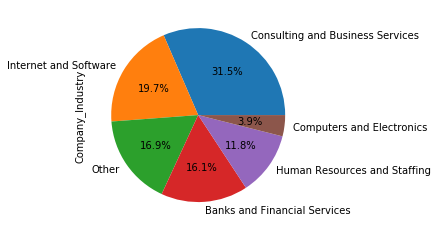

In [7]:
df_ind.plot(kind = 'pie', autopct = '%1.1f%%')

In [8]:
# Top skills by industry
df1['Company_Industry'].value_counts()
# Top five industries are: 
# Consulting and Business Services                                   712
# Internet and Software                                              620
# Banks and Financial Services                                       455
# Health Care                                                        306
# Insurance                                                          214

df_ind2 = df1.loc[:,['Queried_Salary', 'Company_Industry']]
len(df_ind2 )

df_ind2 = df_ind2.replace('', np.NaN)
len(df_ind2)
sum(df_ind2['Company_Industry'].value_counts())
# 3,675 + 1,809 blanks = 5,484 total

# # df_ind2=df_ind2.replace({'Health Care' : 'Other'})
# # df_ind2=df_ind2.replace({'Insurance' : 'Other'})

df_ind2=df_ind2.replace({'Industrial Manufacturing' : 'Other'})
df_ind2=df_ind2.replace({'Aerospace and Defense' : 'Other'})
df_ind2=df_ind2.replace({'Retail' : 'Other'})
df_ind2=df_ind2.replace({'Education and Schools' : 'Other'})
df_ind2=df_ind2.replace({'Computers and Electronics' : 'Other'})
df_ind2=df_ind2.replace({'Consumer Goods and Services' : 'Other'})
df_ind2=df_ind2.replace({'Media, News and Publishing' : 'Other'})
df_ind2=df_ind2.replace({'Human Resources and Staffing' : 'Other'})
df_ind2=df_ind2.replace({'Telecommunications' : 'Other'})
df_ind2=df_ind2.replace({'Government' : 'Other'})
df_ind2=df_ind2.replace({'Pharmaceuticals' : 'Other'})
df_ind2=df_ind2.replace({'Energy and Utilities' : 'Other'})
df_ind2=df_ind2.replace({'Restaurants, Travel and Leisure' : 'Other'})
df_ind2=df_ind2.replace({'Restaurants, Travel and LeisureConsulting and Business Services' : 'Other'})
df_ind2=df_ind2.replace({'Auto' : 'Other'})
df_ind2=df_ind2.replace({'Transport and Freight' : 'Other'})
df_ind2=df_ind2.replace({'InsuranceHealth Care' : 'Other'})
df_ind2=df_ind2.replace({'Real Estate' : 'Other'})
df_ind2=df_ind2.replace({'Organization' : 'Other'})
df_ind2=df_ind2.replace({'Agriculture and Extraction' : 'Other'})
df_ind2=df_ind2.replace({'Food and Beverages' : 'Other'})
df_ind2=df_ind2.replace({'Construction' : 'Other'})
df_ind2=df_ind2.replace({'RetailConsumer Goods and Services' : 'Other'})
df_ind2=df_ind2.replace({'Real EstateReal Estate' : 'Other'})
df_ind2=df_ind2.replace({'Industrial ManufacturingConsumer Goods and Services' : 'Other'})
df_ind2=df_ind2.replace({'Industrial ManufacturingConstruction' : 'Other'})
df_ind2=df_ind2.replace({'Food and BeveragesConsulting and Business Services' : 'Other'})
df_ind2=df_ind2.replace({'Industrial ManufacturingAgriculture and Extraction' : 'Other'})
# sum(df_ind2['Company_Industry'].value_counts())
# 3,675 is count, none lost in process


In [9]:
df_ind2 = df_ind2['Company_Industry'].value_counts()
df_ind2
df_ind2_sum = pd.DataFrame ({"Industry": df_ind2})
df_ind2_sum



,Industry
Other,1368
Consulting and Business Services,712
Internet and Software,620
Banks and Financial Services,455
Health Care,306
Insurance,214


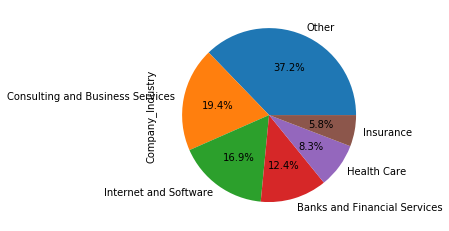

In [10]:
df_ind2.plot(kind = 'pie', autopct = '%1.1f%%')

In [11]:
# Make Dataset for just Industry = Consulting and Business Services
df1_CBS = df1[df1['Company_Industry']=='Consulting and Business Services']
df1_CBS

CBS_sum_Py = sum(df1_CBS['python'])
CBS_sum_Py
CBS_sum_SQL = sum(df1_CBS['sql'])
CBS_sum_ML = sum(df1_CBS['machine learning'])
CBS_sum_R = sum(df1_CBS['r'])
CBS_sum_Had = sum(df1_CBS['hadoop'])
CBS_sum_Tab = sum(df1_CBS['tableau'])
CBS_sum_SAS = sum(df1_CBS['sas'])
CBS_sum_Spark = sum(df1_CBS['spark'])
CBS_sum_Java = sum(df1_CBS['java'])
CBS_sum_Others = sum(df1_CBS['Others'])

# Make Dataset for just Industry = Consulting and Business Services
df1_CBS = df1[df1['Company_Industry']=='Consulting and Business Services']
df1_CBS
CBS_sum_Total = len(df1_CBS)

CBS_sum_Py = sum(df1_CBS['python'])
CBS_sum_Py
CBS_sum_SQL = sum(df1_CBS['sql'])
CBS_sum_ML = sum(df1_CBS['machine learning'])
CBS_sum_R = sum(df1_CBS['r'])
CBS_sum_Had = sum(df1_CBS['hadoop'])
CBS_sum_Tab = sum(df1_CBS['tableau'])
CBS_sum_SAS = sum(df1_CBS['sas'])
CBS_sum_Spark = sum(df1_CBS['spark'])
CBS_sum_Java = sum(df1_CBS['java'])
CBS_sum_Others = sum(df1_CBS['Others'])

# Make Dataset for just Industry = Internet and Software
df1_IS = df1[df1['Company_Industry']=='Internet and Software']
df1_IS
IS_sum_Total = len(df1_IS)

IS_sum_Py = sum(df1_IS['python'])
IS_sum_Py
IS_sum_SQL = sum(df1_IS['sql'])
IS_sum_ML = sum(df1_IS['machine learning'])
IS_sum_R = sum(df1_IS['r'])
IS_sum_Had = sum(df1_IS['hadoop'])
IS_sum_Tab = sum(df1_IS['tableau'])
IS_sum_SAS = sum(df1_IS['sas'])
IS_sum_Spark = sum(df1_IS['spark'])
IS_sum_Java = sum(df1_IS['java'])
IS_sum_Others = sum(df1_IS['Others'])

# Make Dataset for just Industry = Banks and Financial Services
df1_BFS = df1[df1['Company_Industry']=='Banks and Financial Services']
df1_BFS
BFS_sum_Total = len(df1_BFS)

BFS_sum_Py = sum(df1_BFS['python'])
BFS_sum_Py
BFS_sum_SQL = sum(df1_BFS['sql'])
BFS_sum_ML = sum(df1_BFS['machine learning'])
BFS_sum_R = sum(df1_BFS['r'])
BFS_sum_Had = sum(df1_BFS['hadoop'])
BFS_sum_Tab = sum(df1_BFS['tableau'])
BFS_sum_SAS = sum(df1_BFS['sas'])
BFS_sum_Spark = sum(df1_BFS['spark'])
BFS_sum_Java = sum(df1_BFS['java'])
BFS_sum_Others = sum(df1_BFS['Others'])

# Make Dataset for just Industry = Health Care
df1_HC = df1[df1['Company_Industry']== 'Health Care']
df1_HC
HC_sum_Total = len(df1_HC)

HC_sum_Py = sum(df1_HC['python'])
HC_sum_Py
HC_sum_SQL = sum(df1_HC['sql'])
HC_sum_ML = sum(df1_HC['machine learning'])
HC_sum_R = sum(df1_HC['r'])
HC_sum_Had = sum(df1_HC['hadoop'])
HC_sum_Tab = sum(df1_HC['tableau'])
HC_sum_SAS = sum(df1_HC['sas'])
HC_sum_Spark = sum(df1_HC['spark'])
HC_sum_Java = sum(df1_HC['java'])
HC_sum_Others = sum(df1_HC['Others'])

# Make Dataset for just Industry = Insurance
df1_I = df1[df1['Company_Industry']== 'Insurance']
df1_I
I_sum_Total = len(df1_I)

I_sum_Py = sum(df1_I['python'])
I_sum_Py
I_sum_SQL = sum(df1_I['sql'])
I_sum_ML = sum(df1_I['machine learning'])
I_sum_R = sum(df1_I['r'])
I_sum_Had = sum(df1_I['hadoop'])
I_sum_Tab = sum(df1_I['tableau'])
I_sum_SAS = sum(df1_I['sas'])
I_sum_Spark = sum(df1_I['spark'])
I_sum_Java = sum(df1_I['java'])
I_sum_Others = sum(df1_I['Others'])



In [12]:
# df = pd.DataFrame({'Name':['Tom', 'nick', 'krish', 'jack'],
#         'Age':[20, 21, 19, 18]})

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others', 'Total']
CBS = [CBS_sum_Py, CBS_sum_SQL, CBS_sum_ML, CBS_sum_R, CBS_sum_Had, CBS_sum_Tab, CBS_sum_SAS, CBS_sum_Spark, CBS_sum_Java, CBS_sum_Others, CBS_sum_Total]
IS = [IS_sum_Py, IS_sum_SQL, IS_sum_ML, IS_sum_R, IS_sum_Had, IS_sum_Tab, IS_sum_SAS, IS_sum_Spark, IS_sum_Java, IS_sum_Others, IS_sum_Total]
BFS = [BFS_sum_Py, BFS_sum_SQL, BFS_sum_ML, BFS_sum_R, BFS_sum_Had, BFS_sum_Tab, BFS_sum_SAS, BFS_sum_Spark, BFS_sum_Java, BFS_sum_Others, BFS_sum_Total]
HC = [HC_sum_Py, HC_sum_SQL, HC_sum_ML, HC_sum_R, HC_sum_Had, HC_sum_Tab, HC_sum_SAS, HC_sum_Spark, HC_sum_Java, HC_sum_Others, HC_sum_Total]
I = [I_sum_Py, I_sum_SQL, I_sum_ML, I_sum_R, I_sum_Had, I_sum_Tab, I_sum_SAS, I_sum_Spark, I_sum_Java, I_sum_Others, I_sum_Total]

industry_sum = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS,
    'Health Care': HC,
    'Insurance': I
})
industry_sum

# .map("%1.1f%%".format)


,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance
0,python,426.0,432.0,264.0,126.0,124.0
1,sql,377.0,411.0,310.0,204.0,143.0
2,machine learning,340.0,291.0,187.0,86.0,85.0
3,r,275.0,266.0,171.0,112.0,103.0
4,hadoop,270.0,242.0,165.0,56.0,93.0
5,tableau,200.0,105.0,105.0,82.0,49.0
6,sas,121.0,82.0,96.0,92.0,59.0
7,spark,235.0,212.0,160.0,51.0,35.0
8,java,182.0,215.0,163.0,63.0,71.0
9,Others,658.0,583.0,436.0,290.0,194.0


In [13]:

# Make Dataset for just Industry = Consulting and Business Services
df1_CBS = df1[df1['Company_Industry']=='Consulting and Business Services']
df1_CBS
CBS_sum_Total = len(df1_CBS)

CBS_sum_Py_p = sum(df1_CBS['python'])/CBS_sum_Total
CBS_sum_Py_p
CBS_sum_SQL_p = sum(df1_CBS['sql'])/CBS_sum_Total
CBS_sum_ML_p = sum(df1_CBS['machine learning'])/CBS_sum_Total
CBS_sum_R_p = sum(df1_CBS['r'])/CBS_sum_Total
CBS_sum_Had_p = sum(df1_CBS['hadoop'])/CBS_sum_Total
CBS_sum_Tab_p = sum(df1_CBS['tableau'])/CBS_sum_Total
CBS_sum_SAS_p = sum(df1_CBS['sas'])/CBS_sum_Total
CBS_sum_Spark_p = sum(df1_CBS['spark'])/CBS_sum_Total
CBS_sum_Java_p = sum(df1_CBS['java'])/CBS_sum_Total
CBS_sum_Others_p = sum(df1_CBS['Others'])/CBS_sum_Total

# Make Dataset for just Industry = Internet and Software
df1_IS = df1[df1['Company_Industry']=='Internet and Software']
df1_IS
IS_sum_Total = len(df1_IS)

IS_sum_Py_p = sum(df1_IS['python'])/IS_sum_Total
IS_sum_Py_p
IS_sum_SQL_p = sum(df1_IS['sql'])/IS_sum_Total
IS_sum_ML_p = sum(df1_IS['machine learning'])/IS_sum_Total
IS_sum_R_p = sum(df1_IS['r'])/IS_sum_Total
IS_sum_Had_p = sum(df1_IS['hadoop'])/IS_sum_Total
IS_sum_Tab_p = sum(df1_IS['tableau'])/IS_sum_Total
IS_sum_SAS_p = sum(df1_IS['sas'])/IS_sum_Total
IS_sum_Spark_p = sum(df1_IS['spark'])/IS_sum_Total
IS_sum_Java_p = sum(df1_IS['java'])/IS_sum_Total
IS_sum_Others_p = sum(df1_IS['Others'])/IS_sum_Total

# Make Dataset for just Industry = Banks and Financial Services
df1_BFS = df1[df1['Company_Industry']=='Banks and Financial Services']
df1_BFS
BFS_sum_Total = len(df1_BFS)

BFS_sum_Py_p = sum(df1_BFS['python'])/BFS_sum_Total
BFS_sum_Py_p
BFS_sum_SQL_p = sum(df1_BFS['sql'])/BFS_sum_Total
BFS_sum_ML_p = sum(df1_BFS['machine learning'])/BFS_sum_Total
BFS_sum_R_p = sum(df1_BFS['r'])/BFS_sum_Total
BFS_sum_Had_p = sum(df1_BFS['hadoop'])/BFS_sum_Total
BFS_sum_Tab_p = sum(df1_BFS['tableau'])/BFS_sum_Total
BFS_sum_SAS_p = sum(df1_BFS['sas'])/BFS_sum_Total
BFS_sum_Spark_p = sum(df1_BFS['spark'])/BFS_sum_Total
BFS_sum_Java_p = sum(df1_BFS['java'])/BFS_sum_Total
BFS_sum_Others_p = sum(df1_BFS['Others'])/BFS_sum_Total

# Make Dataset for just Industry = Health Care
df1_HC = df1[df1['Company_Industry']== 'Health Care']
df1_HC
HC_sum_Total = len(df1_HC)

HC_sum_Py_p = sum(df1_HC['python'])/HC_sum_Total
HC_sum_Py_p
HC_sum_SQL_p = sum(df1_HC['sql'])/HC_sum_Total
HC_sum_ML_p = sum(df1_HC['machine learning'])/HC_sum_Total
HC_sum_R_p = sum(df1_HC['r'])/HC_sum_Total
HC_sum_Had_p = sum(df1_HC['hadoop'])/HC_sum_Total
HC_sum_Tab_p = sum(df1_HC['tableau'])/HC_sum_Total
HC_sum_SAS_p = sum(df1_HC['sas'])/HC_sum_Total
HC_sum_Spark_p = sum(df1_HC['spark'])/HC_sum_Total
HC_sum_Java_p = sum(df1_HC['java'])/HC_sum_Total
HC_sum_Others_p = sum(df1_HC['Others'])/HC_sum_Total

# Make Dataset for just Industry = Insurance
df1_I = df1[df1['Company_Industry']== 'Insurance']
df1_I
I_sum_Total = len(df1_I)

I_sum_Py_p = sum(df1_I['python'])/I_sum_Total
I_sum_Py_p
I_sum_SQL_p = sum(df1_I['sql'])/I_sum_Total
I_sum_ML_p = sum(df1_I['machine learning'])/I_sum_Total
I_sum_R_p = sum(df1_I['r'])/I_sum_Total
I_sum_Had_p = sum(df1_I['hadoop'])/I_sum_Total
I_sum_Tab_p = sum(df1_I['tableau'])/I_sum_Total
I_sum_SAS_p = sum(df1_I['sas'])/I_sum_Total
I_sum_Spark_p = sum(df1_I['spark'])/I_sum_Total
I_sum_Java_p = sum(df1_I['java'])/I_sum_Total
I_sum_Others_p = sum(df1_I['Others'])/I_sum_Total



In [14]:
# df = pd.DataFrame({'Name':['Tom', 'nick', 'krish', 'jack'],
#         'Age':[20, 21, 19, 18]})

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others', 'Total']
CBS = ["{:.2%}".format(CBS_sum_Py_p), 
       "{:.2%}".format(CBS_sum_SQL_p), 
       "{:.2%}".format(CBS_sum_ML_p), 
       "{:.2%}".format(CBS_sum_R_p), 
       "{:.2%}".format(CBS_sum_Had_p), 
       "{:.2%}".format(CBS_sum_Tab_p), 
       "{:.2%}".format(CBS_sum_SAS_p), 
       "{:.2%}".format(CBS_sum_Spark_p), 
       "{:.2%}".format(CBS_sum_Java_p), 
       "{:.2%}".format(CBS_sum_Others_p), 
       CBS_sum_Total]
IS = ["{:.2%}".format(IS_sum_Py_p), 
      "{:.2%}".format(IS_sum_SQL_p), 
      "{:.2%}".format(IS_sum_ML_p), 
      "{:.2%}".format(IS_sum_R_p), 
      "{:.2%}".format(IS_sum_Had_p), 
      "{:.2%}".format(IS_sum_Tab_p), 
      "{:.2%}".format(IS_sum_SAS_p), 
      "{:.2%}".format(IS_sum_Spark_p), 
      "{:.2%}".format(IS_sum_Java_p), 
      "{:.2%}".format(IS_sum_Others_p), 
      IS_sum_Total]
BFS = ["{:.2%}".format(BFS_sum_Py_p), 
       "{:.2%}".format(BFS_sum_SQL_p), 
       "{:.2%}".format(BFS_sum_ML_p), 
       "{:.2%}".format(BFS_sum_R_p), 
       "{:.2%}".format(BFS_sum_Had_p), 
       "{:.2%}".format(BFS_sum_Tab_p), 
       "{:.2%}".format(BFS_sum_SAS_p), 
       "{:.2%}".format(BFS_sum_Spark_p), 
       "{:.2%}".format(BFS_sum_Java_p), 
       "{:.2%}".format(BFS_sum_Others_p), 
       BFS_sum_Total]
HC = ["{:.2%}".format(HC_sum_Py_p), 
      "{:.2%}".format(HC_sum_SQL_p), 
      "{:.2%}".format(HC_sum_ML_p), 
      "{:.2%}".format(HC_sum_R_p), 
      "{:.2%}".format(HC_sum_Had_p), 
      "{:.2%}".format(HC_sum_Tab_p), 
      "{:.2%}".format(HC_sum_SAS_p), 
      "{:.2%}".format(HC_sum_Spark_p), 
      "{:.2%}".format(HC_sum_Java_p), 
      "{:.2%}".format(HC_sum_Others_p), 
      HC_sum_Total]
I = ["{:.2%}".format(I_sum_Py_p),
     "{:.2%}".format(I_sum_SQL_p),
     "{:.2%}".format(I_sum_ML_p),
     "{:.2%}".format(I_sum_R_p),
     "{:.2%}".format(I_sum_Had_p),
     "{:.2%}".format(I_sum_Tab_p),
     "{:.2%}".format(I_sum_SAS_p),
     "{:.2%}".format(I_sum_Spark_p),
     "{:.2%}".format(I_sum_Java_p),
     "{:.2%}".format(I_sum_Others_p),
     I_sum_Total]

industry_sum_p = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS,
    'Health Care': HC,
    'Insurance': I
})
industry_sum_p



,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance
0,python,59.83%,69.68%,58.02%,41.18%,57.94%
1,sql,52.95%,66.29%,68.13%,66.67%,66.82%
2,machine learning,47.75%,46.94%,41.10%,28.10%,39.72%
3,r,38.62%,42.90%,37.58%,36.60%,48.13%
4,hadoop,37.92%,39.03%,36.26%,18.30%,43.46%
5,tableau,28.09%,16.94%,23.08%,26.80%,22.90%
6,sas,16.99%,13.23%,21.10%,30.07%,27.57%
7,spark,33.01%,34.19%,35.16%,16.67%,16.36%
8,java,25.56%,34.68%,35.82%,20.59%,33.18%
9,Others,92.42%,94.03%,95.82%,94.77%,90.65%


In [15]:
# df = pd.DataFrame({'Name':['Tom', 'nick', 'krish', 'jack'],
#         'Age':[20, 21, 19, 18]}

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java', 'Others']
CBS = [CBS_sum_Py_p, 
       CBS_sum_SQL_p, 
       CBS_sum_ML_p, 
       CBS_sum_R_p, 
       CBS_sum_Had_p, 
       CBS_sum_Tab_p, 
       CBS_sum_SAS_p, 
       CBS_sum_Spark_p, 
       CBS_sum_Java_p, 
       CBS_sum_Others_p]
IS = [IS_sum_Py_p, 
      IS_sum_SQL_p, 
      IS_sum_ML_p, 
      IS_sum_R_p, 
      IS_sum_Had_p, 
      IS_sum_Tab_p, 
      IS_sum_SAS_p, 
      IS_sum_Spark_p, 
      IS_sum_Java_p, 
      IS_sum_Others_p]
BFS = [BFS_sum_Py_p, 
       BFS_sum_SQL_p, 
       BFS_sum_ML_p, 
       BFS_sum_R_p, 
       BFS_sum_Had_p, 
       BFS_sum_Tab_p, 
       BFS_sum_SAS_p, 
       BFS_sum_Spark_p, 
       BFS_sum_Java_p, 
       BFS_sum_Others_p]
HC = [HC_sum_Py_p, 
      HC_sum_SQL_p, 
      HC_sum_ML_p, 
      HC_sum_R_p, 
      HC_sum_Had_p, 
      HC_sum_Tab_p, 
      HC_sum_SAS_p, 
      HC_sum_Spark_p, 
      HC_sum_Java_p, 
      HC_sum_Others_p]
I = [I_sum_Py_p,
     I_sum_SQL_p,
     I_sum_ML_p,
     I_sum_R_p,
     I_sum_Had_p,
     I_sum_Tab_p,
     I_sum_SAS_p,
     I_sum_Spark_p,
     I_sum_Java_p,
     I_sum_Others_p]

industry_sum_no_p = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS,
    'Health Care': HC,
    'Insurance': I
})
industry_sum_no_p


,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance
0,python,0.598315,0.696774,0.580220,0.411765,0.579439
1,sql,0.529494,0.662903,0.681319,0.666667,0.668224
2,machine learning,0.477528,0.469355,0.410989,0.281046,0.397196
3,r,0.386236,0.429032,0.375824,0.366013,0.481308
4,hadoop,0.379213,0.390323,0.362637,0.183007,0.434579
5,tableau,0.280899,0.169355,0.230769,0.267974,0.228972
6,sas,0.169944,0.132258,0.210989,0.300654,0.275701
7,spark,0.330056,0.341935,0.351648,0.166667,0.163551
8,java,0.255618,0.346774,0.358242,0.205882,0.331776
9,Others,0.924157,0.940323,0.958242,0.947712,0.906542


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

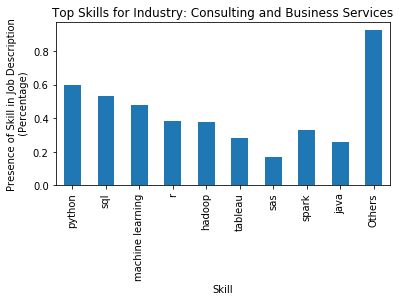

In [16]:
CBSbar = industry_sum_no_p.loc[:, ['Skill', 'Consulting and Business Services']]
CBSbar = CBSbar.set_index(['Skill'])
CBSbar 
#= CBSbar['Consulting and Business Services'].mean()
CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = CBSbar['Consulting and Business Services']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Consulting and Business Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

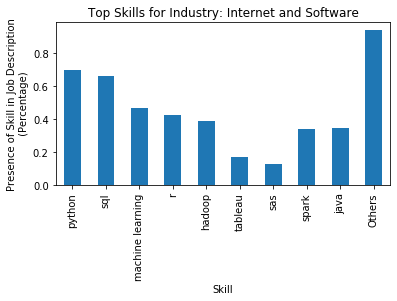

In [17]:
ISbar = industry_sum_no_p.loc[:, ['Skill', 'Internet and Software']]
ISbar = ISbar.set_index(['Skill'])
ISbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = ISbar['Internet and Software']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Internet and Software")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

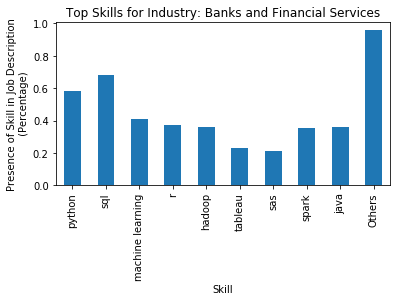

In [18]:
BFSbar = industry_sum_no_p.loc[:, ['Skill', 'Banks and Financial Services']]
BFSbar = BFSbar.set_index(['Skill'])
BFSbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = BFSbar['Banks and Financial Services']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Banks and Financial Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

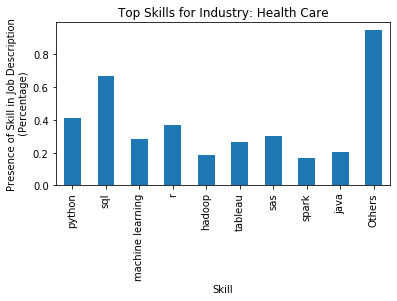

In [19]:
HCbar = industry_sum_no_p.loc[:, ['Skill', 'Health Care']]
HCbar = HCbar.set_index(['Skill'])
HCbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = HCbar['Health Care']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Health Care")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

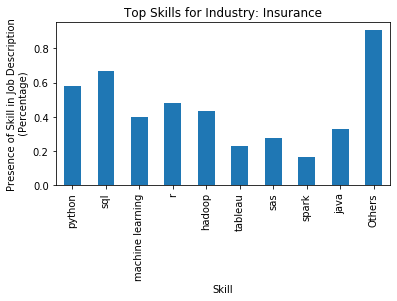

In [20]:
Ibar = industry_sum_no_p.loc[:, ['Skill', 'Insurance']]
Ibar = Ibar.set_index(['Skill'])
Ibar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = Ibar['Insurance']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Insurance")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


In [21]:
# df = pd.DataFrame({'Name':['Tom', 'nick', 'krish', 'jack'],
#         'Age':[20, 21, 19, 18]}

Skill= ['python', 'sql','machine learning', 'r', 'hadoop', 'tableau', 'sas', 'spark', 'java']
CBS = [CBS_sum_Py_p, 
       CBS_sum_SQL_p, 
       CBS_sum_ML_p, 
       CBS_sum_R_p, 
       CBS_sum_Had_p, 
       CBS_sum_Tab_p, 
       CBS_sum_SAS_p, 
       CBS_sum_Spark_p, 
       CBS_sum_Java_p]
IS = [IS_sum_Py_p, 
      IS_sum_SQL_p, 
      IS_sum_ML_p, 
      IS_sum_R_p, 
      IS_sum_Had_p, 
      IS_sum_Tab_p, 
      IS_sum_SAS_p, 
      IS_sum_Spark_p, 
      IS_sum_Java_p]
BFS = [BFS_sum_Py_p, 
       BFS_sum_SQL_p, 
       BFS_sum_ML_p, 
       BFS_sum_R_p, 
       BFS_sum_Had_p, 
       BFS_sum_Tab_p, 
       BFS_sum_SAS_p, 
       BFS_sum_Spark_p, 
       BFS_sum_Java_p]
HC = [HC_sum_Py_p, 
      HC_sum_SQL_p, 
      HC_sum_ML_p, 
      HC_sum_R_p, 
      HC_sum_Had_p, 
      HC_sum_Tab_p, 
      HC_sum_SAS_p, 
      HC_sum_Spark_p, 
      HC_sum_Java_p]
I = [I_sum_Py_p,
     I_sum_SQL_p,
     I_sum_ML_p,
     I_sum_R_p,
     I_sum_Had_p,
     I_sum_Tab_p,
     I_sum_SAS_p,
     I_sum_Spark_p,
     I_sum_Java_p]

industry_sum_no_p_no_o = pd.DataFrame({
    'Skill':Skill,
    'Consulting and Business Services': CBS,
    'Internet and Software': IS,
    'Banks and Financial Services': BFS,
    'Health Care': HC,
    'Insurance': I
})
industry_sum_no_p_no_o


,Skill,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance
0,python,0.598315,0.696774,0.580220,0.411765,0.579439
1,sql,0.529494,0.662903,0.681319,0.666667,0.668224
2,machine learning,0.477528,0.469355,0.410989,0.281046,0.397196
3,r,0.386236,0.429032,0.375824,0.366013,0.481308
4,hadoop,0.379213,0.390323,0.362637,0.183007,0.434579
5,tableau,0.280899,0.169355,0.230769,0.267974,0.228972
6,sas,0.169944,0.132258,0.210989,0.300654,0.275701
7,spark,0.330056,0.341935,0.351648,0.166667,0.163551
8,java,0.255618,0.346774,0.358242,0.205882,0.331776


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

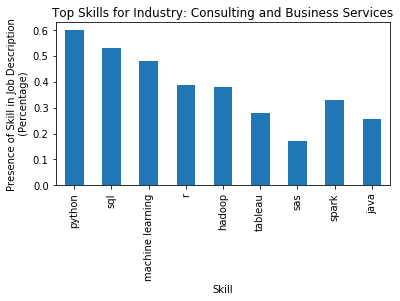

In [22]:
CBSbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Consulting and Business Services']]
CBSbar = CBSbar.set_index(['Skill'])
CBSbar 
#= CBSbar['Consulting and Business Services'].mean()
CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = CBSbar['Consulting and Business Services']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Consulting and Business Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

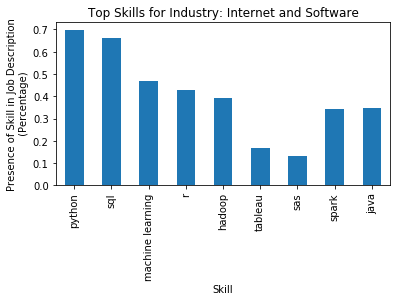

In [23]:
ISbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Internet and Software']]
ISbar = ISbar.set_index(['Skill'])
ISbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = ISbar['Internet and Software']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Internet and Software")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

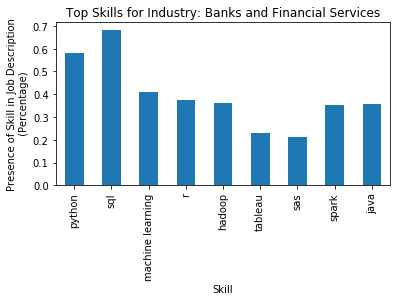

In [24]:
BFSbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Banks and Financial Services']]
BFSbar = BFSbar.set_index(['Skill'])
BFSbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = BFSbar['Banks and Financial Services']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Banks and Financial Services")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

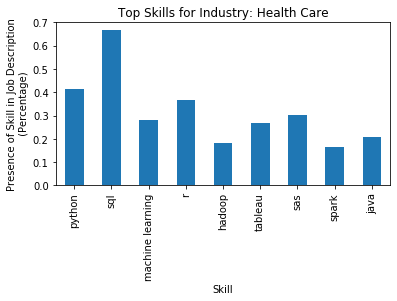

In [25]:
HCbar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Health Care']]
HCbar = HCbar.set_index(['Skill'])
HCbar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = HCbar['Health Care']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Health Care")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


Text(0, 0.5, 'Presence of Skill in Job Description\n (Percentage)')

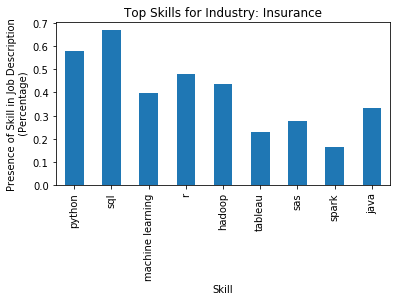

In [34]:
Ibar = industry_sum_no_p_no_o.loc[:, ['Skill', 'Insurance']]
Ibar = Ibar.set_index(['Skill'])
Ibar 
#= CBSbar['Consulting and Business Services'].mean()
# CBSbar 
# = pd.DataFrame[["G":CBSbar]]
# CBSbar.plot(kind = 'bar', autopct = '%1.1f%%')

x_axis = Ibar['Insurance']

x_axis.plot(kind="bar",  figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Top Skills for Industry: Insurance")
plt.xlabel("Skill")
plt.ylabel("Presence of Skill in Job Description\n (Percentage)")


In [35]:
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x,y)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2/n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
#     rcorr = r-((r-1)**2)/(n-1)
#     kcorr = k-((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [36]:
# def correlation_ratio(categories, measurements):
#     fcat, _ = pd.factorize(categories)
#     cat_num = np.max(fcat)+1
#     y_avg_array = np.zeros(cat_num)
#     n_array = np.zeros(cat_num)
#     for i in range(0,cat_num):
#         cat_measures = measurements[np.argwhere(fcat == i).flatten()]
#         n_array[i] = len(cat_measures)
#         y_avg_array[i] = np.average(cat_measures)
#     y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
#     numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
#     denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
#     if numerator == 0:
#         eta = 0.0
#     else:
#         eta = np.sqrt(numerator/denominator)
#     return eta

In [37]:
def cramers_V(var1,var2):
  # Cross table building
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  # Keeping of the test statistic of the Chi2 test
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) # Number of observations
  # Take the minimum value between the columns and the rows of the cross table
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

In [38]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)


NameError: name 'data_encoded' is not defined

In [39]:
df_cram = df1.loc[:,['>160000', \
                     'python']]
df_cram
# , 

,>160000,python
0,0.0,0
1,0.0,1
2,0.0,1
3,0.0,0
4,0.0,0
...,...,...
5710,1.0,1
5711,1.0,0
5712,1.0,0
5713,1.0,1


In [40]:
def cramers_V(var1,var2):
  # Cross table building
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  # Keeping of the test statistic of the Chi2 test
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) # Number of observations
  # Take the minimum value between the columns and the rows of the cross table
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

rows= []

for var1 in df_cram:
  col = []
  for var2 in df_cram :
    cramers =cramers_V(df_cram[var1], df_cram[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_cram_sum = pd.DataFrame(cramers_results, columns = df_cram.columns, index =df_cram.columns)
df_cram_sum

,>160000,python
>160000,1.0,0.0
python,0.0,1.0


In [41]:
df_cram_1 = df1.loc[:,['<80000', '80000-99999','100000-119999',\
                     '120000-139999','140000-159999','>160000', \
                     'python', 'sql', 'machine learning', 'r', \
                      'hadoop', 'spark', 'java', 'tableau', \
                       'datamining', 'hive', 'sas', 'bigdata',\
                       'aws', 'scala', 'nosql', 'c/c++'
                      ]]
df_cram_1

,<80000,80000-99999,100000-119999,120000-139999,140000-159999,>160000,python,sql,machine learning,r,...,java,tableau,datamining,hive,sas,bigdata,aws,scala,nosql,c/c++
0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,0,0
5711,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
5712,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
5713,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [42]:
def cramers_V(var1,var2):
  # Cross table building
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) 
  # Keeping of the test statistic of the Chi2 test
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) # Number of observations
  # Take the minimum value between the columns and the rows of the cross table
  mini = min(crosstab.shape)-1 
  return (stat/(obs*mini))

rows= []

for var1 in df_cram_1:
  col = []
  for var2 in df_cram_1 :
    cramers =cramers_V(df_cram_1[var1], df_cram_1[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results_1 = np.array(rows)
df_cram_sum_1 = pd.DataFrame(cramers_results_1, columns = df_cram_1.columns, \
                           index =df_cram_1.columns)
df_cram_sum_1

,<80000,80000-99999,100000-119999,120000-139999,140000-159999,>160000,python,sql,machine learning,r,...,java,tableau,datamining,hive,sas,bigdata,aws,scala,nosql,c/c++
<80000,1.00,0.03,0.05,0.04,0.03,0.01,0.09,0.00,0.06,0.02,...,0.03,0.00,0.00,0.03,0.00,0.02,0.02,0.02,0.01,0.01
80000-99999,0.03,1.00,0.06,0.06,0.04,0.02,0.02,0.01,0.03,0.00,...,0.02,0.01,0.00,0.02,0.00,0.02,0.01,0.02,0.01,0.00
100000-119999,0.05,0.06,1.00,0.10,0.06,0.03,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
120000-139999,0.04,0.06,0.10,1.00,0.06,0.02,0.03,0.00,0.02,0.01,...,0.01,0.00,0.00,0.02,0.00,0.02,0.01,0.01,0.01,0.01
140000-159999,0.03,0.04,0.06,0.06,1.00,0.01,0.02,0.01,0.03,0.00,...,0.02,0.00,0.00,0.01,0.00,0.01,0.01,0.02,0.00,0.00
>160000,0.01,0.02,0.03,0.02,0.01,1.00,0.00,0.01,0.01,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
python,0.09,0.02,0.00,0.03,0.02,0.00,1.00,0.02,0.10,0.19,...,0.07,0.00,0.00,0.03,0.00,0.01,0.04,0.03,0.01,0.03
sql,0.00,0.01,0.00,0.00,0.01,0.01,0.02,1.00,0.02,0.01,...,0.01,0.03,0.00,0.03,0.01,0.01,0.01,0.01,0.07,0.00
machine learning,0.06,0.03,0.00,0.02,0.03,0.01,0.10,0.02,1.00,0.09,...,0.01,0.01,0.04,0.00,0.00,0.01,0.00,0.00,0.00,0.04
r,0.02,0.00,0.01,0.01,0.00,0.00,0.19,0.01,0.09,1.00,...,0.00,0.02,0.04,0.01,0.12,0.00,0.01,0.00,0.00,0.01


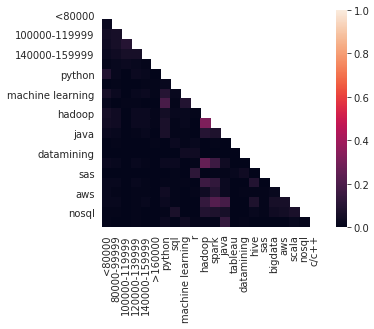

In [43]:
mask = np.zeros_like(df_cram_sum_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


with sns.axes_style("white"):
  ax = sns.heatmap(df_cram_sum_1, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

In [ ]:

chisquare([16, 18, 16, 14, 12, 12])

In [45]:
def lin_reg_plot(x_values,y_values, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept  
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # New Scatter plot with regression line
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,'r-')
    plt.annotate(line_eq,text_coordinates,fontsize=14,color="red")
    
    # Add R-squared annotation
    print(f'The r-squared is: {rvalue}')
    print(line_eq)

The r-squared is: 0.042078194975562665
y = 0.02x + 0.06


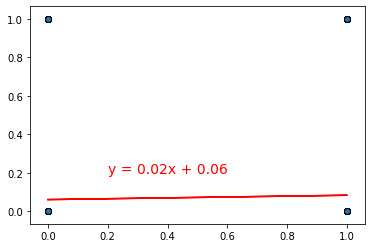

In [46]:
x_values = df_cram_1['python']
y_values = df_cram_1['>160000']

lin_reg_plot(x_values,y_values, (.2, .2))


In [47]:
X = df1[[
    'Consulting and Business Services', \
    'python', \
    'sql', \
    'machine learning', \
    'r', \
    'hadoop', \
    'spark', \
    'java', \
    'tableau', \
    'datamining', \
    'hive', 'sas', \
    'bigdata',\
    'aws',  \
    'scala',  \
    'nosql',  \
    'c/c++',  \
    'naturallanguageprocessing', \
    'oracle', \
    'datawarehouse', \
    'linux', \
    'ai', \
    'microsoftsqlserver', \
    'tensorflow', \
    'kafka', \
    'dataanalysis', \
    'azure', \
    'matlab', \
    'microsoftoffice', \
    'scripting', \
    'pig', \
    'git', \
    'microsoftpowerpoint', \
    'excel', \
    'designexperience', \
    'javascript', \
    'hbase', \
    'cassandra', \
    'postgresql', \
    'mysql', \
    'perl', \
    'spss', \
    'softwaredevelopment', \
    'shellscripting', \
    'datascience', \
    'docker', \
    'mongodb', \
    '.net', \
    'projectmanagement', \
    'businessintelligence', \
    's3'       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df1['>160000']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
# X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                >160000   R-squared (uncentered):                   0.110
Model:                            OLS   Adj. R-squared (uncentered):              0.102
Method:                 Least Squares   F-statistic:                              13.23
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                   1.55e-102
Time:                        18:57:36   Log-Likelihood:                         -336.28
No. Observations:                5483   AIC:                                      774.6
Df Residuals:                    5432   BIC:                                      1112.
Df Model:                          51                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [48]:
# '>160000', 'Consulting and Business Services' - Short
X = df1[[
    'Consulting and Business Services', \
    'python', \
    'sql', \
    'machine learning', \
    'hadoop', \
    'spark', \
    'tableau', \
    'datamining', \
    'bigdata',\
    'aws',  \
    'scala',  \
    'c/c++',  \
    'linux', \
    'tensorflow', \
    'kafka', \
    'azure', \
    'pig', \
    'git', \
    'softwaredevelopment', \
    'docker', \
    's3'       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df1['>160000']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
# X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                >160000   R-squared (uncentered):                   0.107
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              31.06
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                   3.77e-117
Time:                        18:58:48   Log-Likelihood:                         -347.96
No. Observations:                5483   AIC:                                      737.9
Df Residuals:                    5462   BIC:                                      876.7
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [55]:
# 'Sal_Ind_Cat4-5-6', 'Consulting and Business Services' - Short
X = df1[[
    'CA', \
    'NY', \
    'MA', \
    'VA', \
    'DC', \
    'Consulting and Business Services', \
    'python', \
    'sql', \
    'machine learning', \
    'hadoop', \
    'spark', \
    'tableau', \
    'datamining', \
    'bigdata',\
    'aws',  \
    'scala',  \
    'c/c++',  \
    'linux', \
    'tensorflow', \
    'kafka', \
    'azure', \
    'pig', \
    'git', \
    'softwaredevelopment', \
    'docker', \
    's3'       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df1['Sal_Ind_Cat4-5-6']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
# X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:       Sal_Ind_Cat4-5-6   R-squared (uncentered):                   0.612
Model:                            OLS   Adj. R-squared (uncentered):              0.610
Method:                 Least Squares   F-statistic:                              331.5
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                        0.00
Time:                        19:23:48   Log-Likelihood:                         -3074.7
No. Observations:                5483   AIC:                                      6201.
Df Residuals:                    5457   BIC:                                      6373.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [50]:
# 'Sal_Ind_Cat4-5-6', 'Consulting and Business Services' - Short
X = df1[[
    'python'
       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df1['>160000']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
# X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                >160000   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):              0.056
Method:                 Least Squares   F-statistic:                              328.6
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                    2.22e-71
Time:                        19:10:09   Log-Likelihood:                         -497.62
No. Observations:                5483   AIC:                                      997.2
Df Residuals:                    5482   BIC:                                      1004.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
# 'Sal_Ind_Cat4-5-6',     
# 'Consulting and Business Services', \
# 'Internet and Software', \
#     'Banks and Financial Services', \
#     'Health Care', \
#     'Insurance', 
# - Short

X = df1[[
    'Consulting and Business Services', \
    'Internet and Software', \
    'Banks and Financial Services', \
    'Health Care', \
    'Insurance',
    'python', \
    'sql', \
    'machine learning', \
    'hadoop', \
    'spark', \
    'tableau', \
    'datamining', \
    'bigdata',\
    'aws',  \
    'scala',  \
    'c/c++',  \
    'linux', \
    'tensorflow', \
    'kafka', \
    'azure', \
    'pig', \
    'git', \
    'softwaredevelopment', \
    'docker', \
    's3'       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df1['Sal_Ind_Cat4-5-6']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
# X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:       Sal_Ind_Cat4-5-6   R-squared (uncentered):                   0.572
Model:                            OLS   Adj. R-squared (uncentered):              0.570
Method:                 Least Squares   F-statistic:                              291.5
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                        0.00
Time:                        19:18:54   Log-Likelihood:                         -3347.8
No. Observations:                5483   AIC:                                      6746.
Df Residuals:                    5458   BIC:                                      6911.
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [ ]:
# 'Sal_Ind_Cat4-5-6',     
# 'Consulting and Business Services', \
# 'Internet and Software', \
#     'Banks and Financial Services', \
#     'Health Care', \
#     'Insurance', 
# - Short

X = df1[[
    'Consulting and Business Services', \
    'Internet and Software', \
    'Banks and Financial Services', \
    'Insurance',
    'python', \
    'sql', \
    'machine learning', \
    'hadoop', \
    'spark', \
    'tableau', \
    'datamining', \
    'bigdata',\
    'aws',  \
    'scala',  \
    'c/c++',  \
    'linux', \
    'azure', \
    'pig', \
    'softwaredevelopment', \
    'docker', \
    's3'       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, 
# you may add additional variables within the brackets
Y = df1['Sal_Ind_Cat4-5-6']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
# X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

In [ ]:
# 'Sal_Ind_Cat4-5-6',     
# 'Consulting and Business Services', \
# 'Internet and Software', \
#     'Banks and Financial Services', \
#     'Health Care', \
#     'Insurance', 
# - Long

X = df1[[
    'Consulting and Business Services', \
    'Internet and Software', \
    'Banks and Financial Services', \
    'Health Care', \
    'Insurance',
    'python', \
    'sql', \
    'machine learning', \
    'r', \
    'hadoop', \
    'spark', \
    'java', \
    'tableau', \
    'datamining', \
    'hive', 'sas', \
    'bigdata',\
    'aws',  \
    'scala',  \
    'nosql',  \
    'c/c++',  \
    'naturallanguageprocessing', \
    'oracle', \
    'datawarehouse', \
    'linux', \
    'ai', \
    'microsoftsqlserver', \
    'tensorflow', \
    'kafka', \
    'dataanalysis', \
    'azure', \
    'matlab', \
    'microsoftoffice', \
    'scripting', \
    'pig', \
    'git', \
    'microsoftpowerpoint', \
    'excel', \
    'designexperience', \
    'javascript', \
    'hbase', \
    'cassandra', \
    'postgresql', \
    'mysql', \
    'perl', \
    'spss', \
    'softwaredevelopment', \
    'shellscripting', \
    'datascience', \
    'docker', \
    'mongodb', \
    '.net', \
    'projectmanagement', \
    'businessintelligence', \
    's3'       
    ]] 

# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df1['Sal_Ind_Cat4-5-6']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)


# # with statsmodels
# X = sm.add_constant(X) # adding a constant

# print('Intercept: \n', regr.intercept_)
# print('Coefficients: \n', regr.coef_)

model = sm.OLS(Y, X).fit()
print_model = model.summary()
print(print_model)

In [ ]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

In [ ]:
############ mcnemar test
# dfx = pd.DataFrame(np.random.randint(2, size= (90, 2)),
#                   columns= ['time1', 'time2'])

# crosstab, res = researchpy.crosstab(dfx['time1'], dfx['time2'], test= "mcnemar")

# crosstab
# res

#############
# crosstab1, res1 = researchpy.crosstab(df_cram_1['python'],df_cram_1['>160000'],  test= "mcnemar")

# crosstab1
# res1

In [ ]:
#######
# replacement_list = ['Insurance',
# 'Health Care',
# 'Media, News and Publishing',
# 'Telecommunications',
# 'Industrial Manufacturing',
# 'Pharmaceuticals',
# 'Retail',
# 'Aerospace and Defense',
# 'Auto',
# 'Consumer Goods and Services',
# 'Real Estate',
# 'Construction',
# 'Energy and Utilities',
# 'Restaurants, Travel and LeisureConsulting and Business Services',
# 'Transport and Freight']

# for i in replacement_list:
#     df_ind1=df_ind.replace({i : 'Other'})
# df_ind1

# for index, row in df_ind1.iterrows():
#     row['1'] = "I am working!"


# for i, row in df_ind.iterrows():
#     df_ind1=df_ind.loc[i,'price_new']  = i 

# for i in replacement_list:
#     df_ind1=df_ind.replace(i : 'Other')
# df_ind1

#######
# Salary_Index = df.iloc[:,4]
# No_of_Skills = df.iloc[:,7]
# correlation = st.pearsonr(Salary_Index,No_of_Skills)

In [ ]:
output_data_v1 = df_ind2.to_csv(r'../04._Output/output_data_v1.csv') 